# Exploratory Data Analysis

* **Section 0: Load dataset**
* **Section 1: Initial dataset observations**
  * Observe target columns
  * Observe feature columns
* **Section 2: Univariate analysis**
  * Sex
  * Age
  * Tenure
  * Count_CA, Count_SA, Count_MF, Count_OVD, Count_CC, Count_CL
  * ActBal_CA, ActBal_SA, ActBal_MF, ActBal_OVD, ActBal_CC, ActBal_CL
  * VolumeCred, VolumeCred_CA
  * TransactionsCred, TransactionsCred_CA
  * VolumeDeb, VolumeDeb_CA, VolumeDebCash_Card, VolumeDebCashless_Card, VolumeDeb_PaymentOrder
  * TransactionsDeb, TransactionsDeb_CA, TransactionsDebCash_Card, TransactionsDebCashless_Card, TransactionsDeb_PaymentOrder

* **Section 3: Multivariate Analysis**

* **Section 4: Data Processing Steps to take**


Training Set: Includes clients with available revenue data.  
Set used for targeting purposes: Clients without revenue data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utlis.data_utils import load_data, merge_data, process_features1, process_features2, get_feature_cols

## Section 0: Load dataset

In [2]:
print("Loading data...")
file = 'DataScientist_CaseStudy_Dataset.xlsx'
soc_dem, products, inflow, sales = load_data(file)
df = merge_data(soc_dem, products, inflow, sales)

Loading data...


 ## Section 1: Initial dataset observations

In [3]:
# Observe data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Client                        1615 non-null   int64  
 1   Sex                           1612 non-null   object 
 2   Age                           1615 non-null   int64  
 3   Tenure                        1615 non-null   int64  
 4   Count_CA                      1615 non-null   int64  
 5   Count_SA                      426 non-null    float64
 6   Count_MF                      306 non-null    float64
 7   Count_OVD                     419 non-null    float64
 8   Count_CC                      170 non-null    float64
 9   Count_CL                      135 non-null    float64
 10  ActBal_CA                     1615 non-null   float64
 11  ActBal_SA                     426 non-null    float64
 12  ActBal_MF                     306 non-null    float64
 13  Act

### Observe targets

In [4]:
revenue_cols = ['Revenue_CL', 'Revenue_CC', 'Revenue_MF']
clients_with_revenue = df[revenue_cols].notna().any(axis=1).sum()
print(f"Clients with any revenue data: {clients_with_revenue} ({clients_with_revenue/len(df)*100:.1f}%)")

sale_cols = ['Sale_CL', 'Sale_CC', 'Sale_MF']
clients_with_sale = df[sale_cols].notna().any(axis=1).sum()
print(f"Clients with any sale data: {clients_with_sale} ({clients_with_sale/len(df)*100:.1f}%)")

classification_target_columns = ['Sale_CL', 'Sale_CC', 'Sale_MF']
regression_target_columns = ['Revenue_CL','Revenue_CC','Revenue_MF']

df.head(3)

Clients with any revenue data: 969 (60.0%)
Clients with any sale data: 969 (60.0%)


,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,909,M,21,27,1,NaN,NaN,1.0,NaN,1.0,...,7.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1217,M,38,165,1,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,850,F,49,44,1,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.893929,0.0


Training Set: Includes clients with available revenue data.  
Set used for targeting purposes: Clients without revenue data

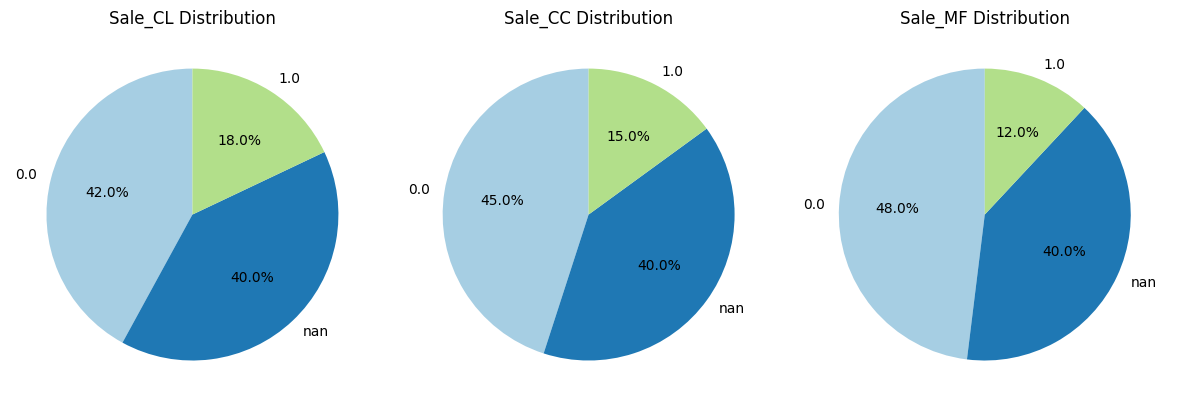

Distribution of Sale_CL
Sale_CL
0.0    0.700722
1.0    0.299278
Name: proportion, dtype: float64


Distribution of Sale_CC
Sale_CC
0.0    0.750258
1.0    0.249742
Name: proportion, dtype: float64


Distribution of Sale_MF
Sale_MF
0.0    0.800826
1.0    0.199174
Name: proportion, dtype: float64




In [ ]:
classification_target_columns = ['Sale_CL', 'Sale_CC', 'Sale_MF']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(classification_target_columns):
    counts = df[col].value_counts(dropna=False)
    labels = [str(x) for x in counts.index]
    axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[i].set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

for col in classification_target_columns:
    print(f"Distribution of {col}")
    print(df[col].value_counts(normalize=True))
    print('\n')

# class weights will be used to address the class imbalance during classification model training




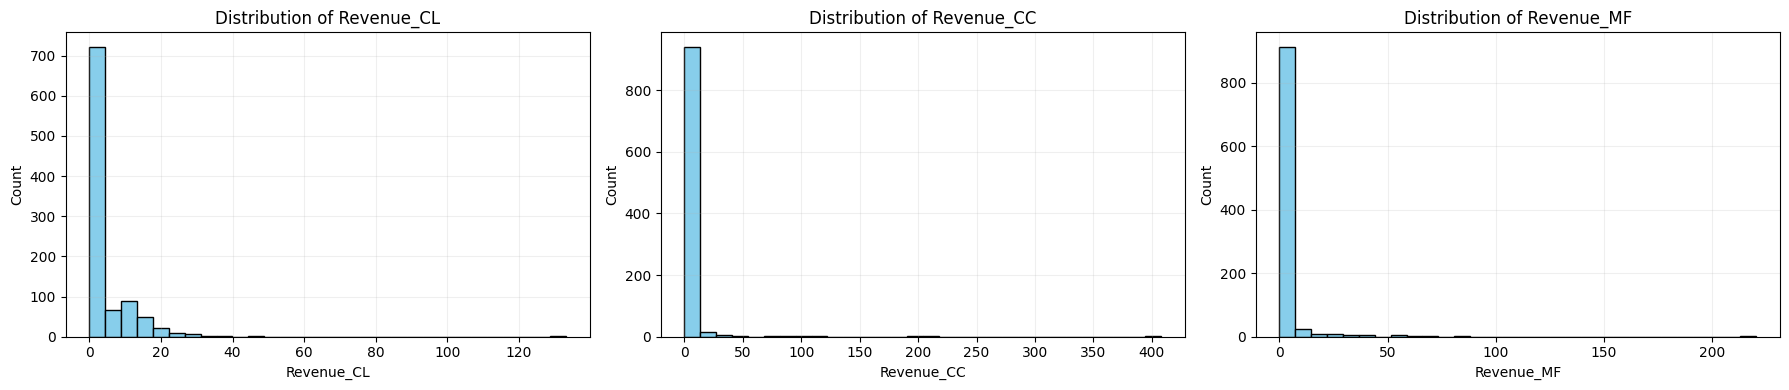

In [6]:
regression_target_columns = ['Revenue_CL','Revenue_CC','Revenue_MF']

# plot for each regression target columns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, col in enumerate(regression_target_columns):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='k')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


### Observe features

feature columns

In [7]:
train_df = df.dropna(subset=['Sale_CL', 'Sale_CC', 'Sale_MF', 'Revenue_CL', 'Revenue_CC', 'Revenue_MF'], how='all')
train_df.shape

(969, 36)

In [8]:
feature_cols = get_feature_cols(train_df)     # exclude = ['Client','Sale_CL', 'Sale_CC', 'Sale_MF', 'Revenue_CL','Revenue_CC','Revenue_MF'] 
print(f"Using {len(feature_cols)} features for modeling")

feature_cols

Using 29 features for modeling


['Sex',
 'Age',
 'Tenure',
 'Count_CA',
 'Count_SA',
 'Count_MF',
 'Count_OVD',
 'Count_CC',
 'Count_CL',
 'ActBal_CA',
 'ActBal_SA',
 'ActBal_MF',
 'ActBal_OVD',
 'ActBal_CC',
 'ActBal_CL',
 'VolumeCred',
 'VolumeCred_CA',
 'TransactionsCred',
 'TransactionsCred_CA',
 'VolumeDeb',
 'VolumeDeb_CA',
 'VolumeDebCash_Card',
 'VolumeDebCashless_Card',
 'VolumeDeb_PaymentOrder',
 'TransactionsDeb',
 'TransactionsDeb_CA',
 'TransactionsDebCash_Card',
 'TransactionsDebCashless_Card',
 'TransactionsDeb_PaymentOrder']

Observe feature columns with missing values

In [9]:
# feature columns with missing values
missing_features = [col for col in feature_cols if train_df[col].isna().any()]
print("Feature columns with missing values in training set:", missing_features)
train_df[missing_features].isnull().sum()


Feature columns with missing values in training set: ['Sex', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


Sex                               2
Count_SA                        704
Count_MF                        785
Count_OVD                       718
Count_CC                        859
Count_CL                        890
ActBal_SA                       704
ActBal_MF                       785
ActBal_OVD                      718
ActBal_CC                       859
ActBal_CL                       890
VolumeCred                       18
VolumeCred_CA                    18
TransactionsCred                 18
TransactionsCred_CA              18
VolumeDeb                        18
VolumeDeb_CA                     18
VolumeDebCash_Card               18
VolumeDebCashless_Card           18
VolumeDeb_PaymentOrder           18
TransactionsDeb                  18
TransactionsDeb_CA               18
TransactionsDebCash_Card         18
TransactionsDebCashless_Card     18
TransactionsDeb_PaymentOrder     18
dtype: int64

## Section 2: Univariate Analysis

### Sex

- since there are only 2 missing values, s small propotion out of dataset, we can drop them  
- Categorical Data, apply label encoding

In [10]:
train_df['Sex'].value_counts() 

Sex
M    515
F    452
Name: count, dtype: int64

In [11]:
train_df[ train_df['Sex'].isna()]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
1062,953,NaN,50,35,1,1.0,NaN,NaN,NaN,NaN,...,18.0,0.0,3.0,7.0,0.0,0.0,1.0,0.0,0.0,15.222143
1494,843,NaN,36,151,1,NaN,NaN,NaN,NaN,NaN,...,23.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Age

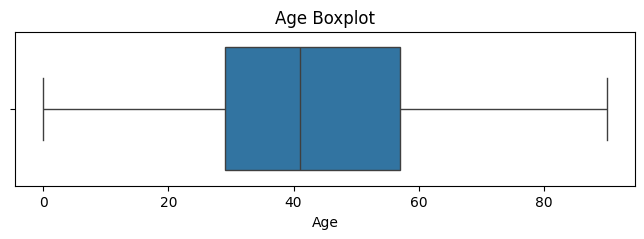

count    969.000000
mean      42.983488
std       18.578951
min        0.000000
25%       29.000000
50%       41.000000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [12]:
plt.figure(figsize=(8,2))
sns.boxplot(x=train_df['Age'])
plt.title('Age Boxplot')
plt.show()

train_df['Age'].describe()

### Tenure

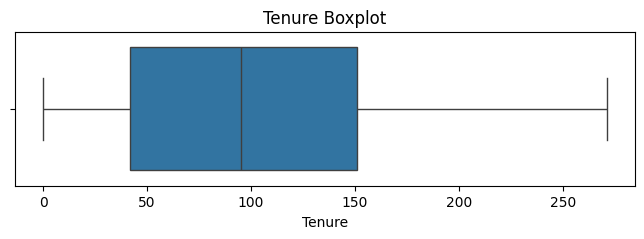

count    969.000000
mean     100.393189
std       65.437097
min        0.000000
25%       42.000000
50%       95.000000
75%      151.000000
max      271.000000
Name: Tenure, dtype: float64

In [13]:
plt.figure(figsize=(8,2))
sns.boxplot(x=train_df['Tenure'])
plt.title('Tenure Boxplot')
plt.show()

train_df['Tenure'].describe()

### Count_CA, Count_SA, Count_MF, Count_OVD, Count_CC, Count_CL


will replace missing values with 0

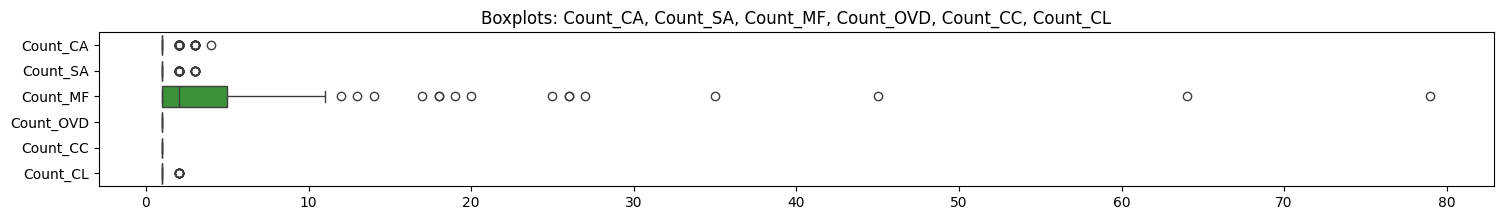

,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL
count,969.000000,265.000000,184.000000,251.0,110.0,79.000000
mean,1.075335,1.181132,5.179348,1.0,1.0,1.113924
std,0.323815,0.457702,9.354897,0.0,0.0,0.319749
min,1.000000,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.0,1.0,1.000000
50%,1.000000,1.000000,2.000000,1.0,1.0,1.000000
75%,1.000000,1.000000,5.000000,1.0,1.0,1.000000
max,4.000000,3.000000,79.000000,1.0,1.0,2.000000


In [14]:
plt.figure(figsize=(18,2))
cols = ['Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL']
sns.boxplot(data=train_df[cols], orient='h')
plt.title('Boxplots: Count_CA, Count_SA, Count_MF, Count_OVD, Count_CC, Count_CL')
plt.show()

train_df[['Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL']].describe()

In [15]:
# Observe high MF count clients
train_df[train_df['Count_MF']>40]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
29,390,M,50,67,1,1.0,79.0,NaN,NaN,NaN,...,38.0,2.0,29.0,6.0,1.0,0.0,0.0,1.379821,0.0,0.000000
580,1329,F,16,149,1,NaN,45.0,NaN,NaN,NaN,...,32.0,3.0,8.0,20.0,1.0,0.0,1.0,13.357143,0.0,7.964286
724,544,M,5,113,1,NaN,64.0,NaN,NaN,NaN,...,24.0,1.0,15.0,6.0,1.0,0.0,1.0,0.059821,0.0,17.785714


### ActBal_CA, ActBal_SA. ActBal_MF, ActBal_OVD, ActBal_CC, ActBal_CL


will replace missing values with 0

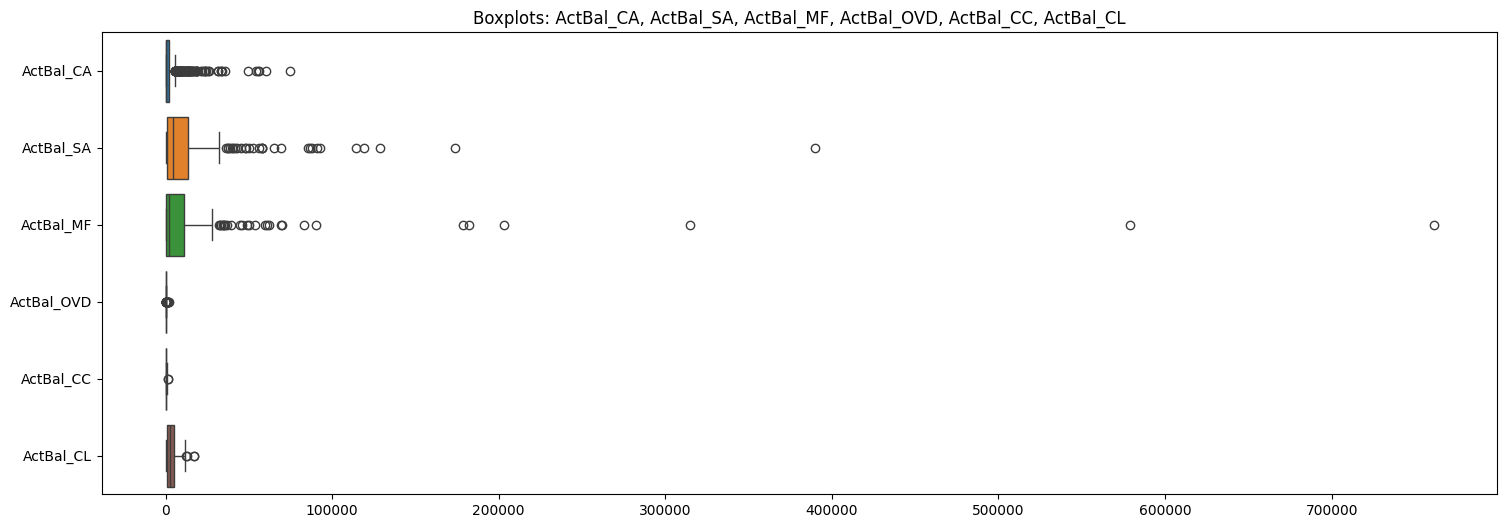

,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
count,969.000000,265.000000,184.000000,251.000000,110.000000,79.000000
mean,2493.026329,14427.773550,21250.471671,147.294607,280.908494,3952.655140
std,6268.027982,32615.370810,77683.063992,323.162968,376.194964,3888.046341
min,0.000000,0.000000,0.000000,0.000000,-15.479286,63.803214
25%,73.135000,725.631429,0.000000,0.000000,0.767857,1085.637679
50%,536.951429,4352.067857,1953.776429,0.000000,37.125000,2906.981786
75%,2262.178929,13326.190357,11241.016339,122.903393,491.310179,5315.682321
max,74934.956071,389883.830714,761235.504286,2055.325357,1767.785357,17300.489643


In [16]:
plt.figure(figsize=(18,6))
cols = ['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']
sns.boxplot(data=train_df[cols], orient='h')
plt.title('Boxplots: ActBal_CA, ActBal_SA, ActBal_MF, ActBal_OVD, ActBal_CC, ActBal_CL')
plt.show()

train_df[['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']].describe()


In [17]:
# Observe high MF count clients
train_df[train_df['ActBal_MF']>400000]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
921,678,F,16,57,1,1.0,3.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,17.154643
1451,775,M,40,151,2,2.0,1.0,1.0,NaN,1.0,...,27.0,2.0,5.0,10.0,1.0,0.0,1.0,1.996071,0.0,19.035714


### VolumeCred, VolumeCred_CA


will replace missing values with 0

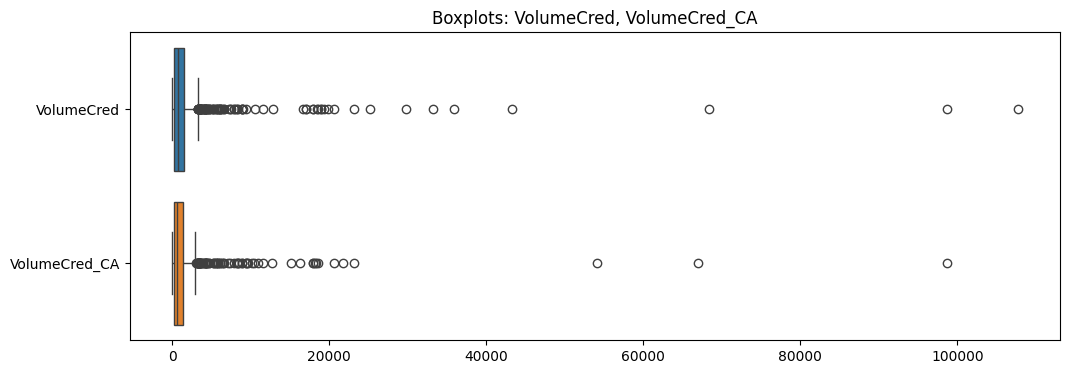

,VolumeCred,VolumeCred_CA
count,951.000000,951.000000
mean,1832.384099,1482.160302
std,6211.583270,4810.626815
min,0.000000,0.000000
25%,269.733571,230.809643
50%,659.253929,634.432857
75%,1450.771607,1317.899821
max,107703.804286,98717.675000


In [18]:
plt.figure(figsize=(12,4))
sns.boxplot(data=train_df[['VolumeCred', 'VolumeCred_CA']], orient='h')
plt.title('Boxplots: VolumeCred, VolumeCred_CA')
plt.show()

train_df[['VolumeCred', 'VolumeCred_CA']].describe()

In [19]:
# Observe high VolumeCred
train_df[train_df['VolumeCred']>80000]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
1374,984,M,29,55,1,NaN,NaN,NaN,NaN,NaN,...,63.0,9.0,22.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,424,F,40,31,1,1.0,1.0,NaN,NaN,NaN,...,35.0,1.0,2.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Observe high VolumeCred
train_df[train_df['VolumeCred_CA']>60000]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
292,924,F,30,135,1,NaN,NaN,1.0,1.0,NaN,...,21.0,0.0,20.0,16.0,0.0,1.0,0.0,0.0,25.040357,0.0
1374,984,M,29,55,1,NaN,NaN,NaN,NaN,NaN,...,63.0,9.0,22.0,23.0,0.0,0.0,0.0,0.0,0.000000,0.0


### TransactionsCred, TransactionsCred_CA

will replace missing values with 0

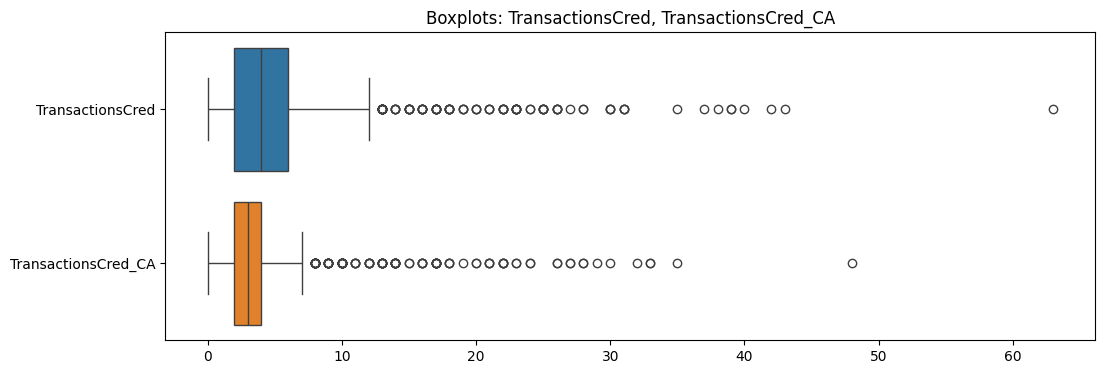

,TransactionsCred,TransactionsCred_CA
count,951.000000,951.000000
mean,5.650894,4.296530
std,6.405269,4.920246
min,0.000000,0.000000
25%,2.000000,2.000000
50%,4.000000,3.000000
75%,6.000000,4.000000
max,63.000000,48.000000


In [21]:
plt.figure(figsize=(12,4))
sns.boxplot(data=train_df[['TransactionsCred', 'TransactionsCred_CA']], orient='h')
plt.title('Boxplots: TransactionsCred, TransactionsCred_CA')
plt.show()

train_df[['TransactionsCred', 'TransactionsCred_CA']].describe()

In [22]:
# Observe high TransactionsCred
train_df[train_df['TransactionsCred']>60]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
619,491,M,53,10,1,NaN,NaN,1.0,1.0,2.0,...,48.0,0.0,6.0,33.0,0.0,0.0,1.0,0.0,0.0,5.162857


In [23]:
# Observe high TransactionsCred_CA
train_df[train_df['TransactionsCred_CA']>45]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
619,491,M,53,10,1,NaN,NaN,1.0,1.0,2.0,...,48.0,0.0,6.0,33.0,0.0,0.0,1.0,0.0,0.0,5.162857


### VolumeDeb, VolumeDeb_CA, VolumeDebCash_Card, VolumeDebCashless_Card, VolumeDeb_PaymentOrder

will replace missing values with 0

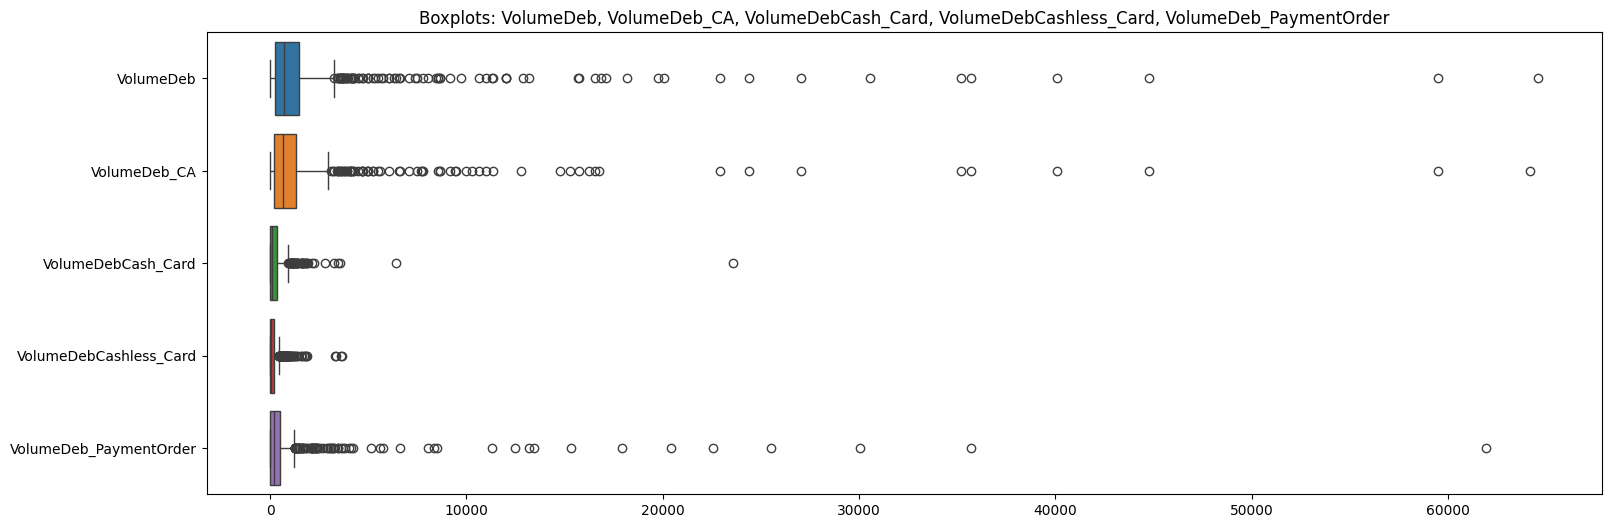

,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder
count,951.000000,951.000000,951.000000,951.000000,951.000000
mean,1704.602524,1504.248163,270.893490,157.730155,719.346524
std,4636.907178,4371.419774,873.632946,333.325850,3097.920573
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,240.738750,220.428571,0.000000,0.000000,0.000000
50%,691.642857,667.607143,89.285714,26.789286,178.142857
75%,1453.959821,1337.509286,357.142857,184.763036,495.377143
max,64608.361429,64178.185357,23571.428571,3637.616786,61955.103929


In [24]:
plt.figure(figsize=(18,6))
sns.boxplot(data=train_df[['VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder']], orient='h')
plt.title('Boxplots: VolumeDeb, VolumeDeb_CA, VolumeDebCash_Card, VolumeDebCashless_Card, VolumeDeb_PaymentOrder')
plt.show()

train_df[['VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder']].describe()


In [25]:
# Observe high VolumeDeb
train_df[train_df['VolumeDeb']>40000]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
292,924,F,30,135,1,NaN,NaN,1.0,1.0,NaN,...,21.0,0.0,20.0,16.0,0.0,1.0,0.0,0.0,25.040357,0.0
713,219,M,70,50,1,1.0,27.0,NaN,NaN,NaN,...,17.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,4.286786,0.0
1374,984,M,29,55,1,NaN,NaN,NaN,NaN,NaN,...,63.0,9.0,22.0,23.0,0.0,0.0,0.0,0.0,0.000000,0.0
1601,424,F,40,31,1,1.0,1.0,NaN,NaN,NaN,...,35.0,1.0,2.0,21.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [26]:
# Observe high VolumeDeb_CA
train_df[train_df['VolumeDeb_CA']>40000]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
292,924,F,30,135,1,NaN,NaN,1.0,1.0,NaN,...,21.0,0.0,20.0,16.0,0.0,1.0,0.0,0.0,25.040357,0.0
713,219,M,70,50,1,1.0,27.0,NaN,NaN,NaN,...,17.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,4.286786,0.0
1374,984,M,29,55,1,NaN,NaN,NaN,NaN,NaN,...,63.0,9.0,22.0,23.0,0.0,0.0,0.0,0.0,0.000000,0.0
1601,424,F,40,31,1,1.0,1.0,NaN,NaN,NaN,...,35.0,1.0,2.0,21.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [27]:
# Observe high VolumeDebCash_Card
train_df[train_df['VolumeDebCash_Card']>20000]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
1374,984,M,29,55,1,NaN,NaN,NaN,NaN,NaN,...,63.0,9.0,22.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Observe high VolumeDeb_PaymentOrder
train_df[train_df['VolumeDeb_PaymentOrder']>30000]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
292,924,F,30,135,1,NaN,NaN,1.0,1.0,NaN,...,21.0,0.0,20.0,16.0,0.0,1.0,0.0,0.0,25.040357,0.000000
883,873,F,31,150,1,NaN,NaN,NaN,NaN,NaN,...,64.0,0.0,31.0,23.0,0.0,1.0,1.0,0.0,16.523571,12.750000
1255,1538,F,35,150,1,1.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.714286,9.964286


### TransactionsDeb_CA, TransactionsDebCash_Card, TransactionsDebCashless_Card, TransactionsDeb_PaymentOrder

will replace missing values with 0

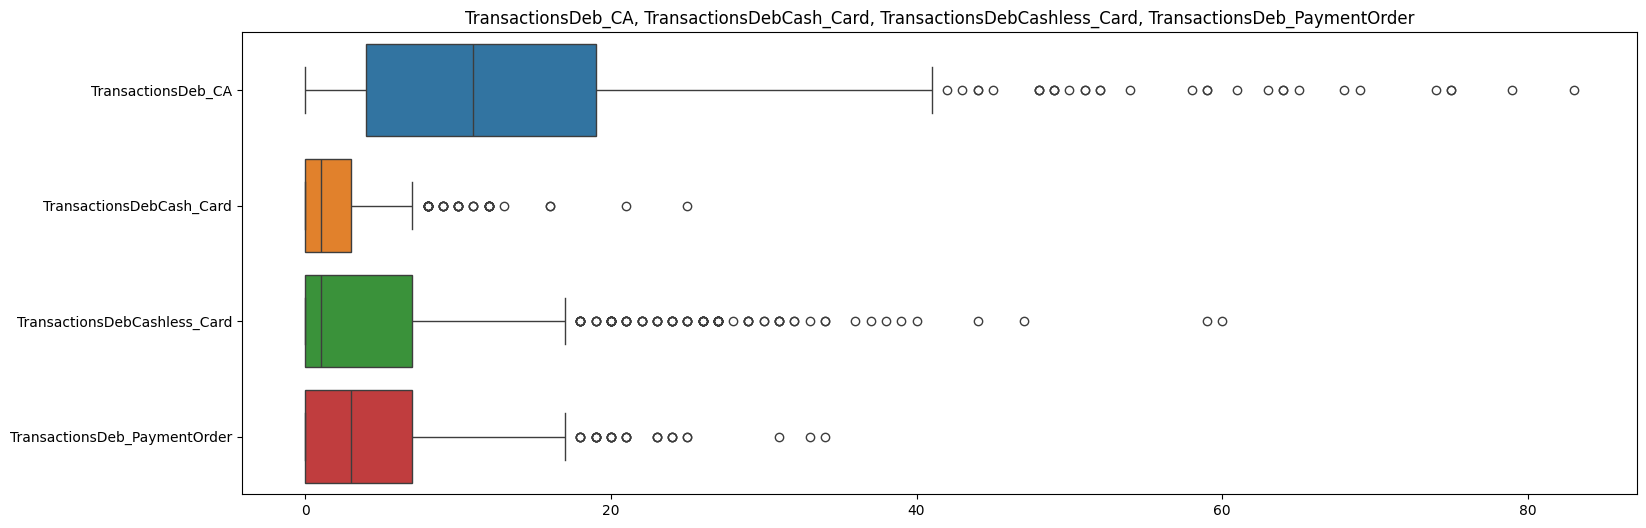

,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
count,951.000000,951.000000,951.000000,951.000000
mean,13.821241,2.018927,5.360673,4.629863
std,13.003061,2.709760,8.376615,5.236684
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,1.000000,3.000000
75%,19.000000,3.000000,7.000000,7.000000
max,83.000000,25.000000,60.000000,34.000000


In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(data=train_df[['TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']], orient='h')
plt.title('TransactionsDeb_CA, TransactionsDebCash_Card, TransactionsDebCashless_Card, TransactionsDeb_PaymentOrder')
plt.show()

train_df[['TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']].describe()


In [30]:
# Observe high TransactionsDeb_CA
train_df[train_df['TransactionsDeb_CA']>70]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
274,1590,M,50,52,1,NaN,NaN,NaN,NaN,NaN,...,83.0,6.0,59.0,14.0,0.0,0.0,1.0,0.000000,0.0,4.607143
525,1042,M,61,83,1,NaN,NaN,1.0,NaN,NaN,...,74.0,8.0,40.0,17.0,1.0,1.0,0.0,0.916786,14.5,0.000000
842,1157,F,71,171,1,1.0,NaN,1.0,1.0,NaN,...,75.0,16.0,31.0,16.0,0.0,0.0,0.0,0.000000,0.0,0.000000
956,1177,F,42,149,1,NaN,NaN,NaN,NaN,NaN,...,75.0,12.0,37.0,15.0,0.0,0.0,1.0,0.000000,0.0,15.071429
1526,465,F,27,43,1,NaN,NaN,NaN,1.0,NaN,...,79.0,25.0,20.0,7.0,0.0,1.0,0.0,0.000000,8.0,0.000000


In [31]:
# Observe high TransactionsDebCashless_Card
train_df[train_df['TransactionsDebCashless_Card']>41]

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
274,1590,M,50,52,1,NaN,NaN,NaN,NaN,NaN,...,83.0,6.0,59.0,14.0,0.0,0.0,1.0,0.00000,0.0,4.607143
323,1496,F,28,103,1,NaN,NaN,NaN,1.0,NaN,...,22.0,3.0,60.0,15.0,1.0,0.0,0.0,5.77125,0.0,0.000000
507,78,F,24,142,1,NaN,NaN,NaN,NaN,NaN,...,64.0,3.0,47.0,10.0,0.0,0.0,0.0,0.00000,0.0,0.000000
1446,823,F,49,9,1,1.0,NaN,NaN,NaN,NaN,...,52.0,0.0,44.0,5.0,0.0,0.0,0.0,0.00000,0.0,0.000000


## Section 3: Multivariate Analysis

In [32]:
train_df_processed1, _ = process_features1(train_df)

train_df_processed1.head(3)

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
1,1217,1,38,165,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,850,0,49,44,1,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.0
3,1473,1,54,34,1,1.0,0.0,0.0,1.0,1.0,...,38.0,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.0


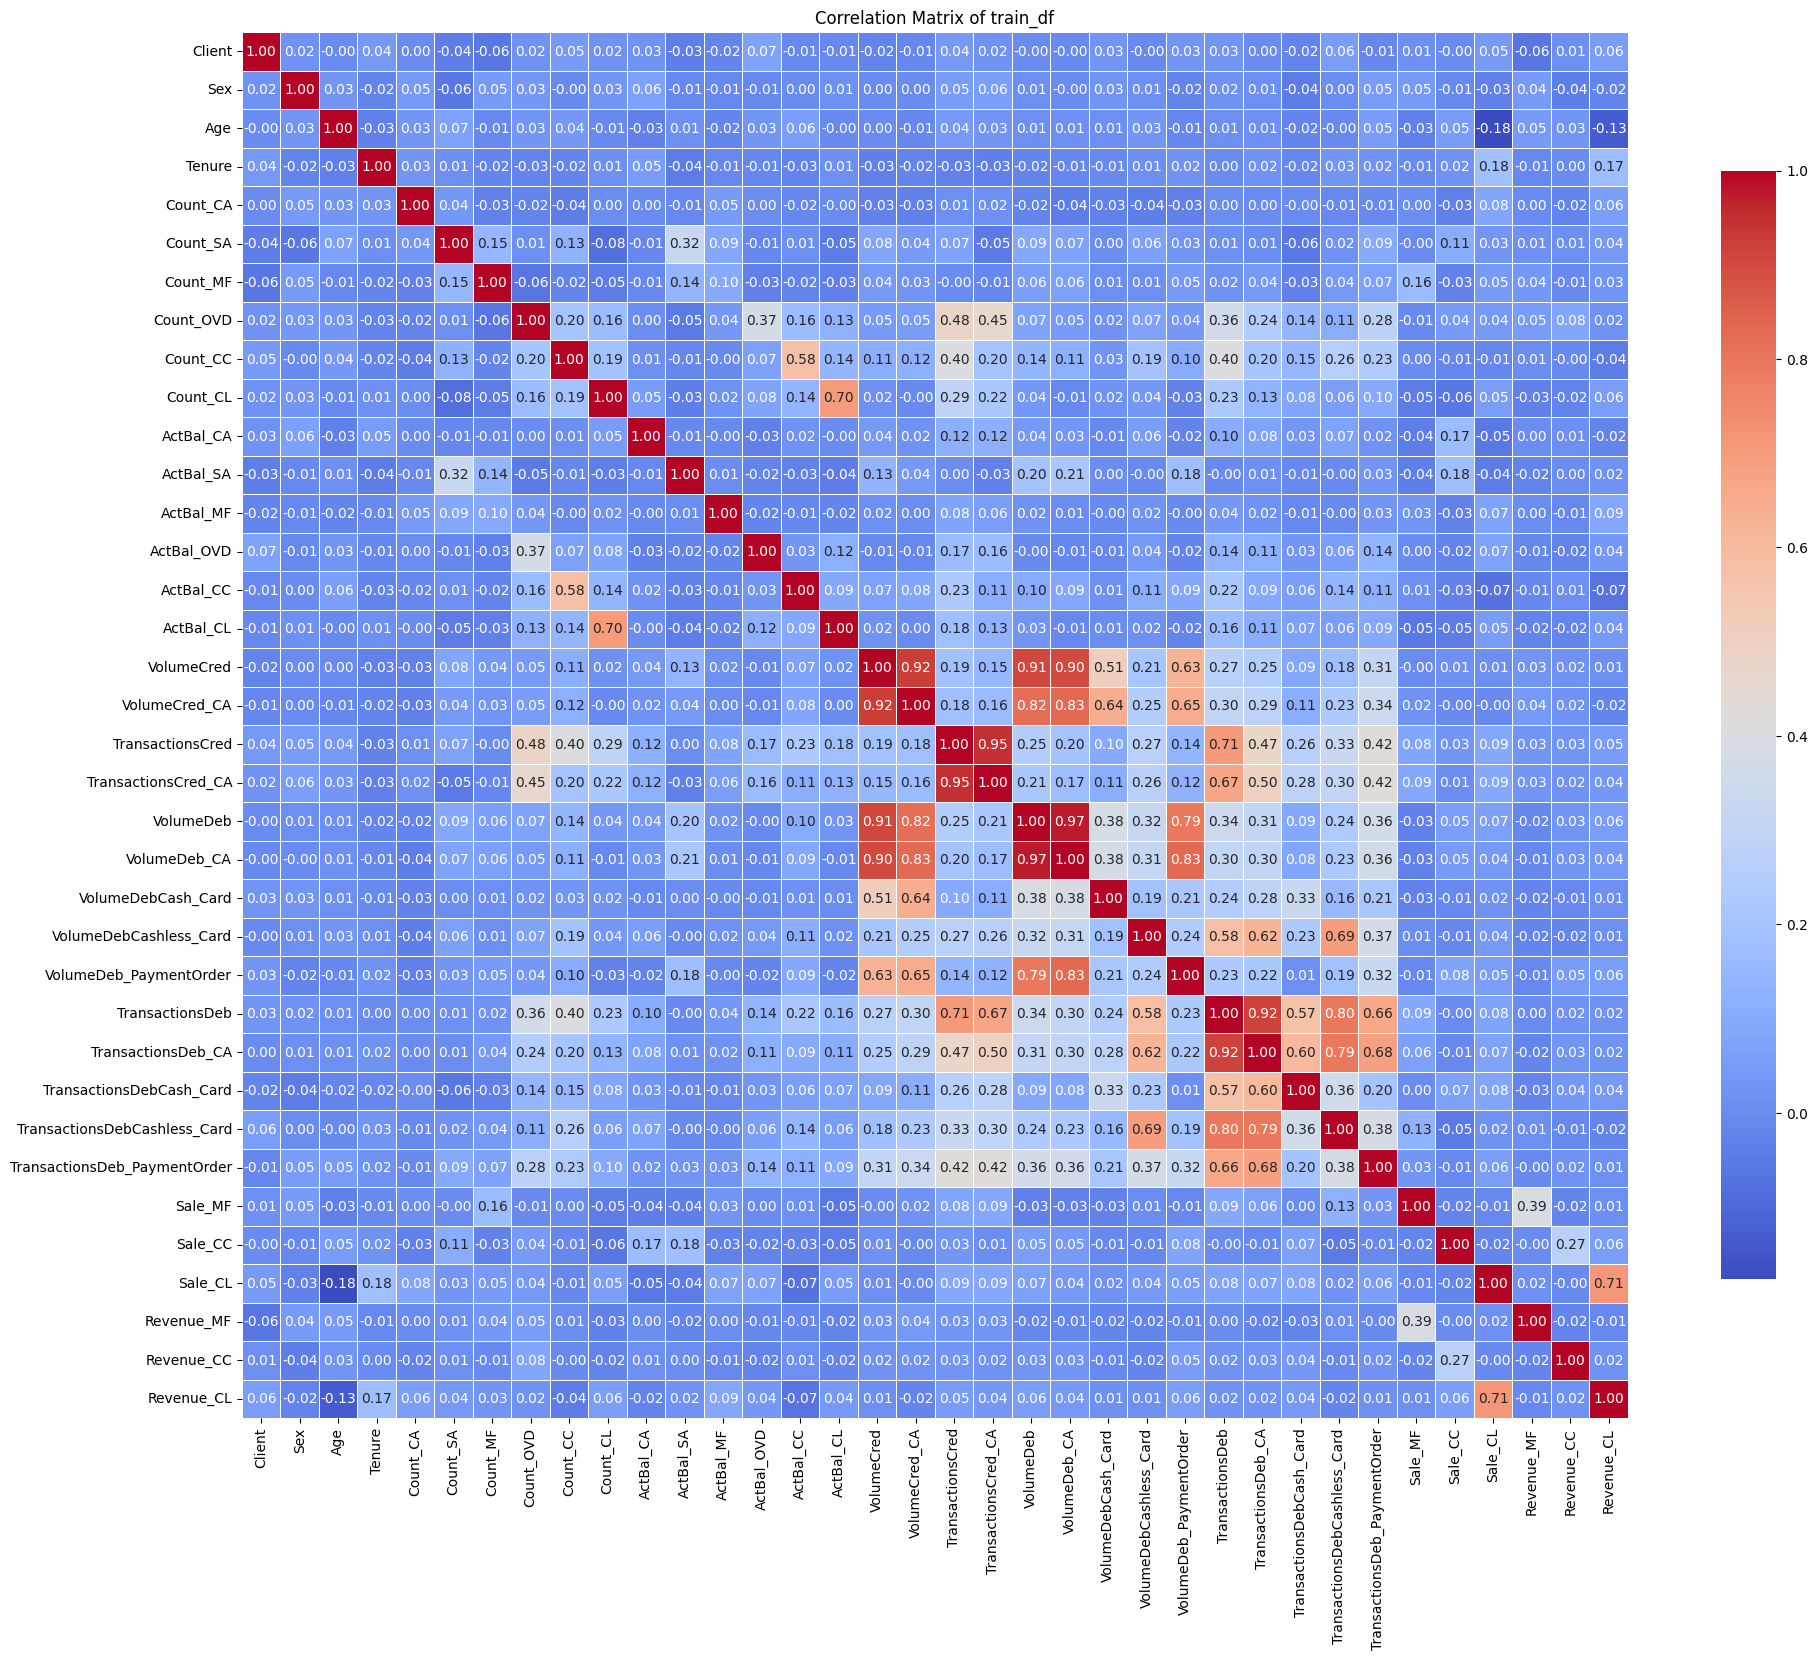

In [33]:
plt.figure(figsize=(24, 18))
corr1 = train_df_processed1.corr()
sns.heatmap(
    corr1,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of train_df")
plt.show()



In [34]:
# Find feature pairs with correlation > 0.9 (excluding self-correlation)
high_corr_pairs = (
    corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(bool))
        .stack()
        .reset_index()
)
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > 0.9]
print(high_corr_pairs)


             Feature1             Feature2  Correlation
440        VolumeCred        VolumeCred_CA     0.924922
443        VolumeCred            VolumeDeb     0.905678
444        VolumeCred         VolumeDeb_CA     0.903448
477  TransactionsCred  TransactionsCred_CA     0.949251
510         VolumeDeb         VolumeDeb_CA     0.972925
575   TransactionsDeb   TransactionsDeb_CA     0.916095


For correlations over 0.9:
- Create a new feature VolumeCredDebRatio = VolumeCred/VolumeDeb  
- Drop VolumeCred feature  
- Drop VolumeDeb_CA feature
- Drop TransactionsCred_CA feature
- Drop TransactionsDeb_CA feature

In [35]:
train_df_processed2, _ = process_features2(train_df)    # after dropping features with high correlation

corr2 = train_df_processed2.corr()

In [36]:
# Find feature pairs with correlation > 0.9 (excluding self-correlation)
high_corr_pairs = (
    corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(bool))
        .stack()
        .reset_index()
)
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > 0.9]
print(high_corr_pairs)

Empty DataFrame
Columns: [Feature1, Feature2, Correlation]
Index: []


## Section 4: Data processing steps to take 

| Feature(s)                                                                 | Processing Step                                      |
|----------------------------------------------------------------------------|------------------------------------------------------|
| Sex                                                                       | (1) Drop missing values  (2) Categorical, label encode |
| Count_CA, Count_SA, Count_MF, Count_OVD, Count_CC, Count_CL               | Replace missing values with 0                        |
| ActBal_CA, ActBal_SA, ActBal_MF, ActBal_OVD, ActBal_CC, ActBal_CL         | Replace missing values with 0                        |
| VolumeCred, VolumeCred_CA                                                 | Replace missing values with 0                        |
| TransactionsCred, TransactionsCred_CA                                     | Replace missing values with 0                        |
| VolumeDeb, VolumeDeb_CA, VolumeDebCash_Card, VolumeDebCashless_Card, VolumeDeb_PaymentOrder | Replace missing values with 0        |
| TransactionsDeb_CA, TransactionsDebCash_Card, TransactionsDebCashless_Card, TransactionsDeb_PaymentOrder | Replace missing values with 0        |
| VolumeCredDebRatio                                                        | Create new feature: VolumeCred / (VolumeDeb + 1)     |
| VolumeCred                                                                | Drop feature                                         |
| VolumeDeb_CA                                                              | Drop feature                                         |
| TransactionsCred_CA                                                       | Drop feature                                         |
| TransactionsDeb_CA                                                        | Drop feature                                         |


Data processing steps implemented in function process_features with [data_utils.py](utlis\data_utils.py)